In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import pyplot as plt
import copy
from netCDF4 import Dataset, num2date, date2num
import more_itertools as mit
from scipy import arange, cos, exp
from scipy.interpolate import RegularGridInterpolator
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.patches as patches
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from haversine import haversine, Unit
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy.stats import rankdata


from matplotlib import colors as c
import csv
import pandas as pd

import matplotlib as mpl

import cc3d
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

import matplotlib as mpl
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.colors import from_levels_and_colors
import random
import cmaps
from scipy import signal

<GeoAxesSubplot:>

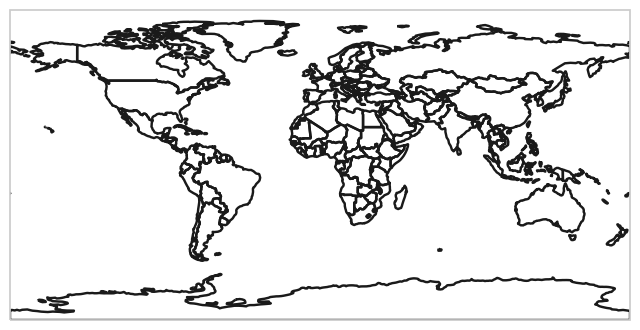

In [2]:
import regionmask
#names = regionmask.defined_regions.natural_earth_v5_0_0.countries_110.names
regionmask.defined_regions.natural_earth_v5_0_0.countries_110.plot(add_label=False)


# land mask, time and spatial information, aridity index

In [3]:
NCname = '/Net/Groups/data_BGC/era5/e1/0d25_daily/t2mmax/t2mmax.daily.an.era5.1440.720.1950.nc'
NCData = Dataset(NCname)
lon_era5 = NCData.variables['longitude'][:]
lat_era5 = NCData.variables['latitude'][:]
LON_era5, LAT_era5 = np.meshgrid(lon_era5, lat_era5)
# var = NCData.variables['t2mmax'][0]
NCData.close()
NCname = '/Net/Groups/BGI/scratch/yt/data/era5_land_surface_mask.nc'
NCData = Dataset(NCname)
land_mask = np.squeeze(NCData.variables['lsm'][:])
lon_era50 = NCData.variables['longitude'][:]
lat_era50 = NCData.variables['latitude'][:]
NCData.close()
land_mask = np.concatenate((land_mask[:,720:] ,land_mask[:,:720]),axis=1 )
lon_era50 = np.concatenate((lon_era50[720:]-360 ,lon_era50[:720]) )
LAT_era5[LAT_era5>np.nanmax(lat_era50)] = np.nanmax(lat_era50)
LAT_era5[LAT_era5<np.nanmin(lat_era50)] = np.nanmin(lat_era50)
LON_era5[LON_era5>np.nanmax(lon_era50)] = np.nanmax(lon_era50)
LON_era5[LON_era5<np.nanmin(lon_era50)] = np.nanmin(lon_era50)

my_interpolating_function = RegularGridInterpolator((lat_era50[::-1],lon_era50), land_mask[::-1])
land_mask  = my_interpolating_function((LAT_era5.ravel(), LON_era5.ravel())).reshape((len(LAT_era5[:,0]),len(LON_era5[0])))


In [4]:
import regionmask
NCname = r'/Net/Groups/BGI/scratch/yt/data/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals-rev11_totpop_1_deg_nc/gpw_v4_population_density_adjusted_rev11_1_deg.nc'
NCData = Dataset(NCname)
lon_PD = NCData.variables['longitude'][:]
lat_PD = NCData.variables['latitude'][:]
LON_PD, LAT_PD = np.meshgrid(lon_PD, lat_PD)
PD = NCData.variables['UN WPP-Adjusted Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 1 degree'][:]
PD[PD<0] = np.nan

a = np.zeros_like(LON_era5)


a[::4,::4]=PD[4][:,:]
a[::4,1::4]=PD[4][:,:]
a[::4,2::4]=PD[4][:,:]
a[::4,3::4]=PD[4][:,:]

a[1::4,::4]=PD[4][:,:]
a[1::4,1::4]=PD[4][:,:]
a[1::4,2::4]=PD[4][:,:]
a[1::4,3::4]=PD[4][:,:]

a[2::4,::4]=PD[4][:,:]
a[2::4,1::4]=PD[4][:,:]
a[2::4,2::4]=PD[4][:,:]
a[2::4,3::4]=PD[4][:,:]

a[3::4,::4]=PD[4][:,:]
a[3::4,1::4]=PD[4][:,:]
a[3::4,2::4]=PD[4][:,:]
a[3::4,3::4]=PD[4][:,:]




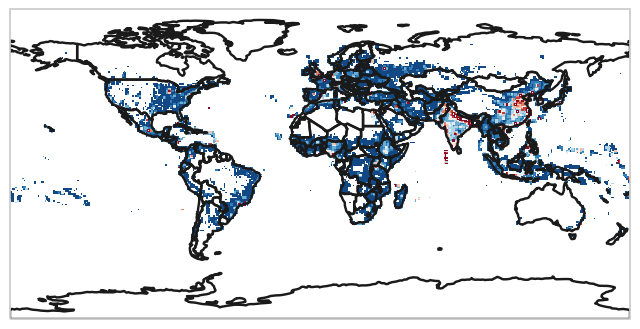

In [5]:

a[a<=10]=np.nan
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
con = ax.contourf(LON_era5, LAT_era5,a,cmap='RdBu_r',levels=np.arange(0,1100,100))
regionmask.defined_regions.natural_earth_v5_0_0.countries_110.plot(ax=ax,add_label=False)
#plt.colorbar(con)
area = copy.deepcopy(a)

In [6]:
ISO_name = []
ISO_code2 = []
ISO_code3 = []
flname = r'/Net/Groups/BGI/scratch/yt/data/WHO/countries_codes_and_coordinates.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    for i_row,row in enumerate(reader):
        if i_row>0:
            ISO_name .append( str(row[0]))
            ISO_code2 .append( str(row[1][2:-1]))
            ISO_code3.append( str(row[2][2:-1]))
ISO_name = np.array(ISO_name)            
ISO_code2 = np.array(ISO_code2)
ISO_code3 = np.array(ISO_code3)

In [7]:

mask = regionmask.defined_regions.natural_earth_v5_0_0.countries_110.mask(lon_era5 , lat_era5)
countrymask = mask.values
country_number = mask.attrs['flag_values']
country_name = mask.attrs['flag_meanings']
country_name = country_name.split(' ') 
country_name = np.array(country_name)
country_number = np.array(country_number)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


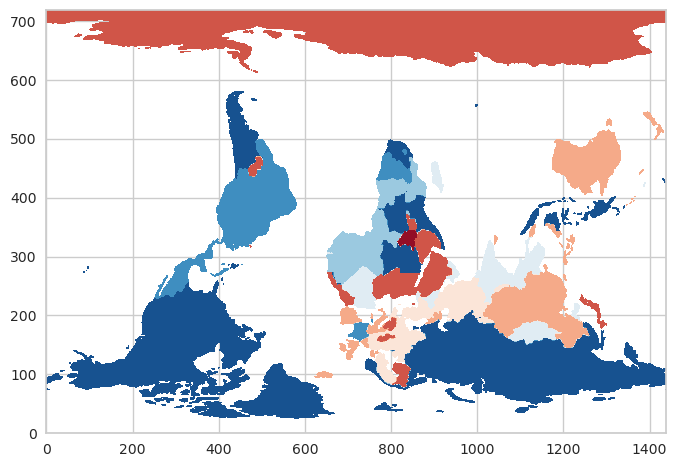

In [8]:
countrymask_sub = copy.deepcopy(countrymask)
plt.contourf(countrymask_sub,cmap='RdBu_r')

In [9]:
country_name[country_name=='INDO']='ID'
country_name[country_name=='DRC']='CD'
country_name[country_name=='RUS']='RU'
country_name[country_name=='N']='NO'
country_name[country_name=='F']='FR'
country_name[country_name=='J']='JM'
country_name[country_name=='IND']='IN'
country_name[country_name=='IRN']='IR'
country_name[country_name=='IRQ']='IQ'
country_name[country_name=='SYR']='SY'
country_name[country_name=='ARM']='AM'
country_name[country_name=='S']='SE'
country_name[country_name=='A']='AT'
country_name[country_name=='EST']='EE'
country_name[country_name=='D']='DE'
country_name[country_name=='L']='LU'
country_name[country_name=='B']='BE'
country_name[country_name=='P']='PT'
country_name[country_name=='E']='ES'
country_name[country_name=='IRL']='IE'
country_name[country_name=='I']='IT'
country_name[country_name=='SLO']='SI'
country_name[country_name=='FIN']='FI'
country_name[country_name=='BiH']='BA'
country_name[country_name=='NM']='MK'
country_name[country_name=='KO']='ME'
country_name[country_name=='PAL']='PL'

In [10]:
country_name_new1 = []
country_name_new2 = []
for j,i in enumerate(country_name):
    print (j,i,ISO_code3[np.in1d(ISO_code2,i)][0],ISO_name[np.in1d(ISO_code2,i)][0])
    country_name_new1.append(ISO_code3[np.in1d(ISO_code2,i)][0])
    country_name_new2.append(ISO_name[np.in1d(ISO_code2,i)][0])
country_name_new1 = np.array(country_name_new1)
country_name_new2 = np.array(country_name_new2)

0 FJ FJI Fiji
1 TZ TZA Tanzania, United Republic of
2 WS WSM Samoa
3 CA CAN Canada
4 US USA United States
5 KZ KAZ Kazakhstan
6 UZ UZB Uzbekistan
7 PG PNG Papua New Guinea
8 ID IDN Indonesia
9 AR ARG Argentina
10 CL CHL Chile
11 CD COD Congo, the Democratic Republic of the
12 SO SOM Somalia
13 KE KEN Kenya
14 SD SDN Sudan
15 TD TCD Chad
16 HT HTI Haiti
17 DO DOM Dominican Republic
18 RU RUS Russian Federation
19 BS BHS Bahamas
20 FK FLK Falkland Islands (Malvinas)
21 NO NOR Norway
22 GL GRL Greenland
23 TF ATF French Southern Territories
24 TL TLS Timor-Leste
25 ZA ZAF South Africa
26 LS LSO Lesotho
27 MX MEX Mexico
28 UY URY Uruguay
29 BR BRA Brazil
30 BO BOL Bolivia, Plurinational State of
31 PE PER Peru
32 CO COL Colombia
33 PA PAN Panama
34 CR CRI Costa Rica
35 NI NIC Nicaragua
36 HN HND Honduras
37 SV SLV El Salvador
38 GT GTM Guatemala
39 BZ BLZ Belize
40 VE VEN Venezuela, Bolivarian Republic of
41 GY GUY Guyana
42 SR SUR Suriname
43 FR FRA France
44 EC ECU Ecuador
45 PR PRI Puer

In [11]:
def remove_seasonal(var):
    var_detrend = np.zeros_like(var)
    for i_box in range(365):
        temp = np.array([var[365*i_year+i_box] for i_year in range(42)])
        temp = temp - np.array(len(temp)*[np.nanmean(temp,axis=0)])
        #temp = signal.detrend(temp,axis=0)
        for i_year in range(42):
            var_detrend[365*i_year+i_box]  = temp[i_year]
    return var_detrend 

In [12]:
def remove_seasonal_normalized(var):
    var_detrend = np.zeros_like(var)
    for i_box in range(365):
        temp = np.array([var[365*i_year+i_box] for i_year in range(42)])
        temp = (temp - np.array(len(temp)*[np.nanmean(temp,axis=0)]))/np.array(len(temp)*[np.nanstd(temp,axis=0)])
        #temp = signal.detrend(temp,axis=0)
        for i_year in range(42):
            var_detrend[365*i_year+i_box]  = temp[i_year]
    return var_detrend 

In [13]:
def SEB_ano(var,skt):
    var_detrend = np.zeros_like(var)
    for i_box in range(365):
        temp = np.array([var[365*i_year+i_box] for i_year in range(42)])
        temp = temp - np.array(len(temp)*[np.nanmean(temp,axis=0)])
        temp1 =  np.array([skt[365*i_year+i_box] for i_year in range(42)])
        temp1 = np.array(len(temp1)*[np.nanmean(temp1,axis=0)])
        temp = temp/(4*5.68*1e-8*temp1**3)
        #temp = signal.detrend(temp,axis=0)
        for i_year in range(42):
            var_detrend[365*i_year+i_box]  = temp[i_year]
    return var_detrend

# mortality

In [14]:
country_code_all = []
country_name_all = []
country_mortality_all = []
country_year_all = []
flname = r'/Net/Groups/BGI/scratch/yt/data/WHO/WHOMortalityDatabase_Trends_years_many_countries_by_age_sex-All Causes_12th September 2023 00_13.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    for i_row,row in enumerate(reader):
        if i_row>6:
            country_code_all.append( row[2])
            country_name_all.append( row[3])
            country_mortality_all.append( float(row[8]))
            country_year_all.append( int(row[4]))
All_country = []
All_code = []
for i,j in zip(country_name_all,country_code_all):
    if i in All_country:
        continue
    else:
        All_country.append(i)
        All_code.append(j)
All_country = np.array(All_country)
All_code = np.array(All_code)

/tmp/ipykernel_3814743/288644464.py:25: RuntimeWarning: Mean of empty slice
  temp = temp-np.nanmean(temp)


118 104


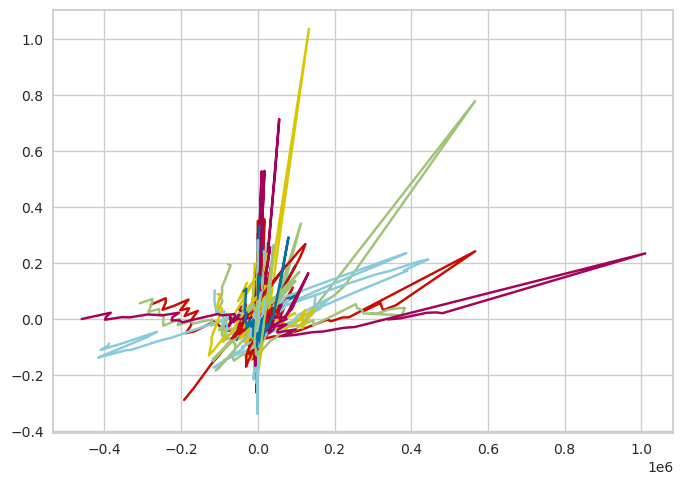

In [15]:
country_mortality_all1 = np.zeros_like(country_mortality_all)
temp_year = []
a = 0
b=0
All_country1 = []
All_code1 = []
for i,ii in zip(All_country,All_code):
    a =a+1
    b=b+1
    temp = np.array(country_mortality_all)[np.in1d(country_name_all,i)]
    temp1 = np.array(country_year_all)[np.in1d(country_name_all,i)]
    temp2 = np.argsort(temp1)
    temp_year.append(temp1[temp2])
    temp[temp1<1979]=temp[temp1<1979]+np.nan
    if (len(temp)<=10)|(np.nanmean(temp1[temp1>1979] )>2010)|(np.nanmean(temp1[temp1>1979] )<1990): 
        b=b-1  
        temp=temp+np.nan
    else:
        All_country1.append(i)
        All_code1.append(ii)
    
    temp[temp==0]=temp[temp==0]+np.nan
    #temp[temp>2000000]=np.nan
    temp0 =copy.deepcopy(temp)
    temp = temp-np.nanmean(temp)

    temp1 = np.array(country_year_all)[np.in1d(country_name_all,i)]
    temp2 = np.argsort(temp1)
    temp3 = temp[temp2]
    temp4 = temp3[~np.isnan(temp3)]
    if len(temp4)==0:
        continue
    else:
        temp4 = signal.detrend(temp4,axis=0)
        temp3[~np.isnan(temp3)] = temp4
    temp5 = np.zeros_like(temp)
    for j in range(len(temp)):
        temp5[temp2[j]]=temp3[j]
    temp5 = temp5/np.nanmean(temp0)
    plt.plot(temp,temp5)

    country_mortality_all1[np.in1d(country_name_all,i)] = temp5
print(a,b)

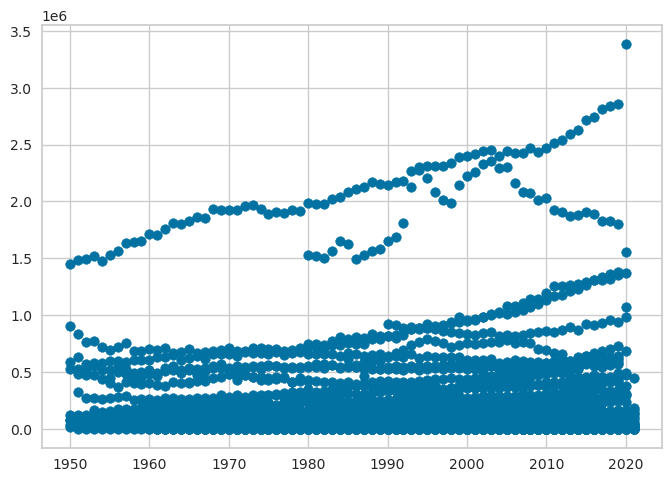

In [16]:
plt.scatter(country_year_all,country_mortality_all)

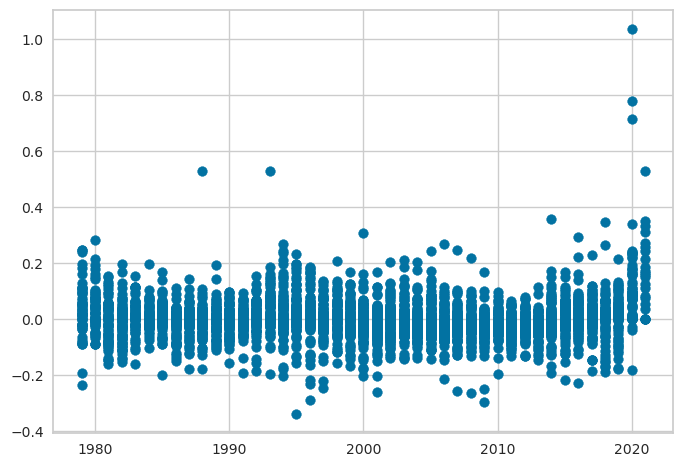

In [17]:
plt.scatter(country_year_all,country_mortality_all1)

In [18]:
All_country_number = []
for j,i in zip(All_country,All_code):

    if len(country_number[np.in1d(country_name_new1,i)])>0:
        All_country_number.append(country_number[np.in1d(country_name_new1,i)][0])
    elif len(country_number[np.in1d(country_name_new2,j)])>0:
        All_country_number.append(country_number[np.in1d(country_name_new2,j)][0])   
    else: 
        All_country_number.append(1000)        

<GeoAxesSubplot:>

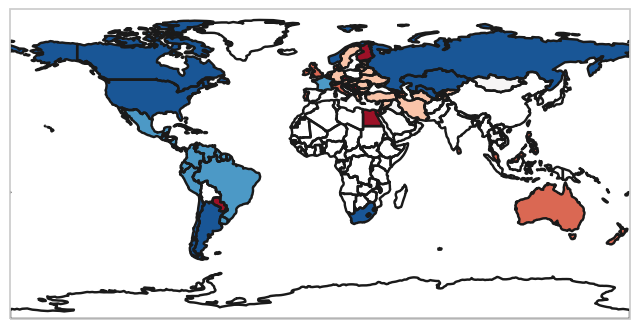

In [19]:
countrymask_sub = copy.deepcopy(countrymask)
countrymask_sub1 = countrymask_sub.ravel()
countrymask_sub1[~np.in1d(countrymask_sub1,All_country_number)]=np.nan
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
ax.contourf(LON_era5, LAT_era5,countrymask_sub1.reshape((720,1440)),cmap='RdBu_r')
regionmask.defined_regions.natural_earth_v5_0_0.countries_110.plot(ax=ax,add_label=False)

In [20]:
All_country_number1 = []
for j,i in zip(All_country1,All_code1):

    if len(country_number[np.in1d(country_name_new1,i)])>0:
        All_country_number1.append(country_number[np.in1d(country_name_new1,i)][0])
    elif len(country_number[np.in1d(country_name_new2,j)])>0:
        All_country_number1.append(country_number[np.in1d(country_name_new2,j)][0])   
    else: 
        All_country_number1.append(1000)   

<GeoAxesSubplot:>

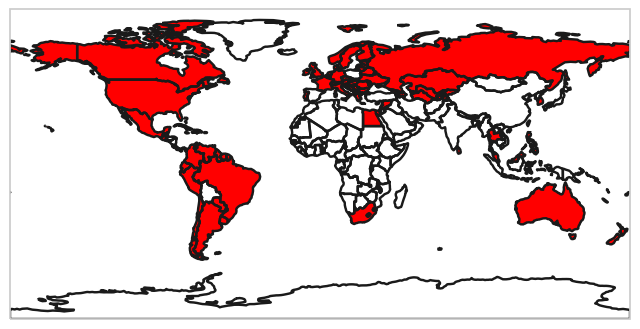

In [21]:
countrymask_sub = copy.deepcopy(countrymask)
countrymask_sub1 = countrymask_sub.ravel()
countrymask_sub1[~np.in1d(countrymask_sub1,All_country_number1)]=np.nan
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
ax.contourf(LON_era5, LAT_era5,countrymask_sub1.reshape((720,1440)),colors='red')
regionmask.defined_regions.natural_earth_v5_0_0.countries_110.plot(ax=ax,add_label=False)


In [22]:
label_map1=np.load(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/label_map_235.csv', allow_pickle=True)

<GeoAxesSubplot:>

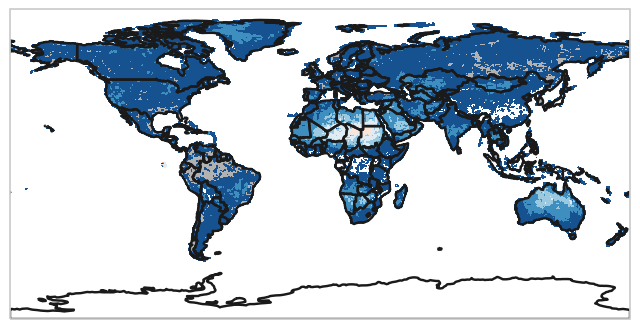

In [23]:

f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
temp = label_map1[2]/42*10

temp[temp<=0]=np.nan
ax.contourf(LON_era5, LAT_era5,countrymask_sub1.reshape((720,1440)),colors='grey',alpha=0.6)
ax.contourf(LON_era5, LAT_era5,temp,cmap='RdBu_r')
regionmask.defined_regions.natural_earth_v5_0_0.countries_110.plot(ax=ax,add_label=False)

In [24]:
country_number_all = []
for j,i in zip(country_name_all,country_code_all):
    if len(country_number[np.in1d(country_name_new1,i)])>0:
        country_number_all.append(country_number[np.in1d(country_name_new1,i)][0])
    elif len(country_number[np.in1d(country_name_new2,j)])>0:
        country_number_all.append(country_number[np.in1d(country_name_new2,j)][0])   
    else: 
        country_number_all.append(1000)     

# one heatwave as whole

In [25]:
year_era5_all = []
mon_era5_all = []
day_era5_all = []
for i_year in range(1979,2021):
    NCname = '/Net/Groups/data_BGC/era5/e1/0d25_daily/t2mmax/t2mmax.daily.an.era5.1440.720.'+str(i_year)+'.nc'
    NCData = Dataset(NCname)
    time = NCData.variables['time']
    dates = list(num2date(time[:], time.units, time.calendar))
    lon_era5 = NCData.variables['longitude'][:]
    lat_era5 = NCData.variables['latitude'][:]
    LON_era5, LAT_era5 = np.meshgrid(lon_era5, lat_era5)
    NCData.close()

    year_era5 = np.array([date.year for date in dates])
    mon_era5 = np.array([date.month for date in dates])
    day_era5 = np.array([date.day for date in dates])
    md_era5 = 100*np.array(mon_era5)+np.array(day_era5)

    year_era5 = np.squeeze(np.array(year_era5)[md_era5!=229])
    mon_era5 = np.squeeze(np.array(mon_era5)[md_era5!=229])
    day_era5= np.squeeze(np.array(day_era5)[md_era5!=229])

    year_era5_all.extend(year_era5)
    mon_era5_all.extend(mon_era5)
    day_era5_all.extend(day_era5)

year_era5_all = np.array(year_era5_all )
mon_era5_all = np.array(mon_era5_all )
day_era5_all = np.array(day_era5_all )
print(lon_era5[:10])
print(len(year_era5_all))
#%%
print('hello from YT')
#%%

[-179.875 -179.625 -179.375 -179.125 -178.875 -178.625 -178.375 -178.125
 -177.875 -177.625]
15330
hello from YT


In [26]:

filelist = os.listdir(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_event_025_degree/')
leastdate = 5

filelist = os.listdir(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_event_025_degree')
HW_date = []
HW_lat = []
HW_lon = []
HW_location_lat = []
HW_location_lon = []
HW_duration = []
HW_aera = []
HW_date_centroid = []
HW_location_centroid = []
for fl in filelist:
    if fl[-4:] != '.csv':
        continue
    flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_event_025_degree/' + fl
    with open(flname, 'r') as file:
        reader = csv.reader(file)
        all = []
        for i_row,row in enumerate(reader):
            if i_row in [6,7,8]:
                all.append(np.array([ round(float(i)) for i in row]))
            else:
                all.append(np.array([ int(i) for i in row]))
    if all[5]<leastdate:
        continue
    if all[6]<40000:
        continue
    if   lat_era5[int(all[8][0])]<-23.5:
        if mon_era5_all[int(all[7])] not in [12,1,2]:
            continue
    if   lat_era5[int(all[8][0])]>=23.5:
        if mon_era5_all[int(all[7])] not in [6,7,8]:
            continue
    HW_date.append(all[0])
    HW_lat.append(all[1])
    HW_lon.append(all[2])
    HW_location_lat.append(all[3])
    HW_location_lon.append(all[4])   
    HW_duration.append(all[5])
    HW_aera.append(all[6])
    HW_date_centroid.append(all[7])
    HW_location_centroid.append(all[8])
    #print(all[0])
    #print(all[1])
    #print(all[2])
print(len(HW_date))
#%%
HW_duration = np.squeeze(np.array(HW_duration))
HW_aera = np.squeeze(np.array(HW_aera))
HW_date_centroid = np.squeeze(np.array(HW_date_centroid))
HW_location_centroid = np.squeeze(np.array( HW_location_centroid ))

HW_center_lon = np.array([lon_era5[i] for i in HW_location_centroid[:,1]])
HW_center_lat = np.array([lat_era5[i] for i in HW_location_centroid[:,0]])
#%%

3454


/tmp/ipykernel_3814743/1109865123.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("precip3_16lev").copy()
  cmap.set_bad('#d4d4d4',np.nan)
/User/homes/ytian/miniconda3/envs/python39/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/User/homes/ytian/miniconda3/envs/python39/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi

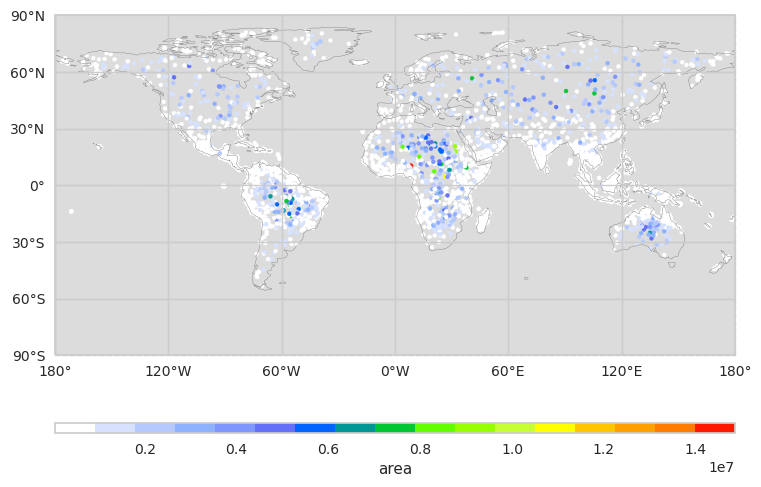

In [27]:

cmap =cmaps.precip3_16lev
fig= plt.figure(figsize=(8, 5))
proj = ccrs.PlateCarree(central_longitude=0)##
ax = plt.axes([0.1, 0.2, 0.85, 0.77],projection = proj)
ax.set_facecolor('#DCDCDC')

cmap.set_bad('#d4d4d4',np.nan)

#con  = ax.contourf(LON_era5,LAT_era5,con_value,cmap=cmap)
levels = MaxNLocator(nbins=14).tick_values(0, 1000000)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
#im = ax.pcolormesh(LON_era5,LAT_era5, con_value, cmap=cmap, norm=norm)

#im = ax.contourf(LON_cmip6,LAT_cmip6, con_value, extend='both', cmap=cmap)
im = ax.scatter(HW_center_lon  ,HW_center_lat,c = HW_aera, cmap=cmap,s=8)
ax.coastlines(color='grey')
ax.gridlines()
ax.set_xticks([-180, -120, -60,0, 60, 120, 180, ], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
rect = patches.Rectangle((90, 27), 103-90+1, 40-27+1, linewidth=1, edgecolor='r', facecolor='none')
#ax.add_patch(rect)
cax = plt.axes([0.1, 0.09, 0.85, 0.02])
for bnd in ['bottom','top','right','left']:
    ax.spines[bnd].set_color('k')
#ax1.grid(b=False)

cbar = plt.colorbar(im,cax=cax,orientation='horizontal', shrink=0.8)
cbar.set_label('area')


ax.grid(linestyle='--')




# Heat wave event indices

In [28]:

filelist = os.listdir(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_event_025_degree/')
leastdate = 5

filelist = os.listdir(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_event_025_degree')
HW_date = []
HW_lat = []
HW_lon = []
HW_location_lat = []
HW_location_lon = []
HW_duration = []
HW_aera = []
HW_date_centroid = []
HW_location_centroid = []
for fl in filelist:
    if fl[-4:] != '.csv':
        continue
    flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_event_025_degree/' + fl
    with open(flname, 'r') as file:
        reader = csv.reader(file)
        all = []
        for i_row,row in enumerate(reader):
            if i_row in [6,7,8]:
                all.append(np.array([ round(float(i)) for i in row]))
            else:
                all.append(np.array([ int(i) for i in row]))
    if all[5]<leastdate:
        continue
    if all[6]<40000:
        continue
    if   lat_era5[int(all[8][0])]<-23.5:
        if mon_era5_all[int(all[7])] not in [12,1,2]:
            continue
    if   lat_era5[int(all[8][0])]>=23.5:
        if mon_era5_all[int(all[7])] not in [6,7,8]:
            continue
    HW_date.append(all[0])
    HW_lat.append(all[1])
    HW_lon.append(all[2])
    HW_location_lat.append(all[3])
    HW_location_lon.append(all[4])   
    HW_duration.append(all[5])
    HW_aera.append(all[6])
    HW_date_centroid.append(all[7])
    HW_location_centroid.append(all[8])
    #print(all[0])
    #print(all[1])
    #print(all[2])
print(len(HW_date))
#%%
HW_duration = np.squeeze(np.array(HW_duration))
HW_aera = np.squeeze(np.array(HW_aera))
HW_date_centroid = np.squeeze(np.array(HW_date_centroid))
HW_location_centroid = np.squeeze(np.array( HW_location_centroid ))
#%%

3454


In [29]:
HW_duration = np.squeeze(np.array(HW_duration))
HW_aera = np.squeeze(np.array(HW_aera))
HW_date_centroid = np.squeeze(np.array(HW_date_centroid))
HW_location_centroid = np.squeeze(np.array( HW_location_centroid ))

HW_year = np.array([year_era5_all[i] for i in HW_date_centroid])
HW_mon = np.array([mon_era5_all[i] for i in HW_date_centroid])
HW_day = np.array([day_era5_all[i] for i in HW_date_centroid])

HW_center_lon = np.array([lon_era5[i] for i in HW_location_centroid[:,1]])
HW_center_lat = np.array([lat_era5[i] for i in HW_location_centroid[:,0]])

HW_location_lon = np.array([lon_era5[i] for i in HW_lon])
HW_location_lat = np.array([lat_era5[i] for i in HW_lat])

/tmp/ipykernel_3814743/2631722566.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  HW_location_lon = np.array([lon_era5[i] for i in HW_lon])
/tmp/ipykernel_3814743/2631722566.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  HW_location_lat = np.array([lat_era5[i] for i in HW_lat])


In [30]:
event_N = len(HW_duration)
print( 'extreme event n = ' +str(event_N))

extreme event n = 3454


In [31]:
# HW_extent = []
# for i_lat, i_lon in zip(HW_location_lat,HW_location_lon):
#     hor_set = []
#     for i,j in zip(i_lat,i_lon):
#         if (i,j) not in hor_set:
#             hor_set.append((i,j) )
#     HW_extent.append(len(hor_set))
# HW_extent = np.array(HW_extent)
# data = np.array([ HW_extent]).T

In [32]:
HW_year_max = np.array([year_era5_all[np.nanmax(i)] for i in HW_date])
HW_mon_max = np.array([mon_era5_all[np.nanmax(i)] for i in HW_date])
HW_day_max = np.array([day_era5_all[np.nanmax(i)] for i in HW_date])

HW_year_min = np.array([year_era5_all[np.nanmin(i)] for i in HW_date])
HW_mon_min = np.array([mon_era5_all[np.nanmin(i)] for i in HW_date])
HW_day_min = np.array([day_era5_all[np.nanmin(i)] for i in HW_date])

HW_day_duration_str = np.array([str(i)+'-'+str(j) for i,j in zip(HW_year_min*10000+HW_mon_min*100+HW_day_min,HW_year_max*10000+HW_mon_max*100+HW_day_max)])

In [33]:

HW_year_all = np.array([year_era5_all[i] for i in HW_date])
HW_mon_all = np.array([mon_era5_all[i] for i in HW_date])
HW_ym = []
for i_year,i_mon in zip(HW_year_all ,HW_mon_all):
    i_ym = (i_year-1979)*12+i_mon
    HW_ym.append(i_ym)
HW_ym = np.array(HW_ym)

/tmp/ipykernel_3814743/1058730609.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  HW_year_all = np.array([year_era5_all[i] for i in HW_date])
/tmp/ipykernel_3814743/1058730609.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  HW_mon_all = np.array([mon_era5_all[i] for i in HW_date])
/tmp/ipykernel_3814743/1058730609.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'd

# Clustering

In [34]:
vername = '_235'

In [35]:
vername = '_235'
var = 'skt'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        all.append(np.array([ float(i) for i in row]))
HW_skt_all = copy.deepcopy(all) 

var = 't2m'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        all.append(np.array([ float(i) for i in row]))
HW_t2m_all = copy.deepcopy(all) 

var = 'ssr'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        all.append(np.array([ float(i) for i in row]))
HW_ssr_all = copy.deepcopy(all)

#

var = 'strd'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        all.append(np.array([ float(i) for i in row]))
HW_strd_all = copy.deepcopy(all)

#

var = 'sshf'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        all.append(np.array([ float(i) for i in row]))
HW_sshf_all = copy.deepcopy(all)

#

var = 'slhf'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        all.append(np.array([ float(i) for i in row]))
HW_slhf_all = copy.deepcopy(all)

# var = 'q'
# flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'.csv'
# with open(flname, 'r') as file:
#     reader = csv.reader(file)
#     all = []
#     for i_row,row in enumerate(reader):
#         all.append(np.array([ float(i) for i in row]))
# HW_q_all = copy.deepcopy(all)

var = 'adv'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'_downscale.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        all.append(np.array([ float(i) for i in row]))
HW_adv_all = copy.deepcopy(all)

var = 'adiabatic'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'_downscale.csv'
with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        all.append(np.array([ float(i) for i in row]))
HW_adiabatic_all = copy.deepcopy(all)

# HW_adiabatic_all = []  
# for iii in range(len(HW_slhf_all)):
#     HW_adiabatic_all.append((HW_t2m_all[iii]-HW_skt_all[iii]-HW_adv_all[iii]))


HW_q_all = []  
for iii in range(len(HW_slhf_all)):
    HW_q_all.append(HW_skt_all[iii]-HW_ssr_all[iii]-HW_strd_all[iii]-HW_slhf_all[iii]-HW_sshf_all[iii])



In [36]:
HW_SEB_all = []
HW_SEB_all1 = []
for iii in range(len(HW_slhf_all)):
    SEB_event = np.array([HW_adv_all[iii],HW_adiabatic_all[iii], HW_ssr_all[iii],HW_strd_all[iii],HW_slhf_all[iii],HW_sshf_all[iii],HW_q_all[iii]]).T
    for ii in  SEB_event:
        if np.isnan(ii/np.sum([np.abs(k) for k in ii])).any():
            #HW_SEB_all.append(np.array([np.nan,np.nan,np.nan,np.nan]))
            continue
        else:
            HW_SEB_all.append(np.array([ii/np.sum([np.abs(k) for k in ii])]))
            HW_SEB_all1.append(np.array(ii))
HW_SEB_all = np.squeeze( np.array(HW_SEB_all))
HW_SEB_all1 = np.squeeze( np.array(HW_SEB_all1))

In [37]:
vername = '_235'
flname = r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_labels'+vername+'.csv'
HW_labels_all1 = []

with open(flname, 'r') as file:
    reader = csv.reader(file)
    all = []
    for i_row,row in enumerate(reader):
        temp = []
        for i_i,i in enumerate(row):
            if np.isnan(float(i)):
                temp.append(np.nan)

            else:
                temp.append(round(float(i)))
                HW_labels_all1.append(round(float(i)))

        all.append(np.array(temp))
HW_labels_all = copy.deepcopy(all)
HW_labels_all1 = np.array(HW_labels_all1)

In [38]:
f_map = np.zeros((4,42,720,1440))
nn = 0
for i_k  in np.arange(event_N):
    xx = HW_lon[i_k]
    yy = HW_lat[i_k]
    zz = HW_labels_all[i_k]
    tt = HW_year_all[i_k]-1979
    for z,t,i,j in zip(zz,tt,yy,xx):

        f_map[z,t,i,j]=f_map[z,t,i,j]+1
        #print(f_map[z,t,i,j])
    nn = nn+1
f_map1 = copy.deepcopy(f_map)
##
f_map1[f_map1==0]=np.nan
f_map[f_map==0]=np.nan
##
len(f_map1[~np.isnan(f_map1)])
##
for t in range(42):
    #print(t)
    for i in range(720):
        for j in range(1440):
            temp = f_map[:,t,i,j]
            #print(t,i,j)``
            if len(temp[temp>0])>1:
                f_map[:,t,i,j]=f_map[:,t,i,j]*np.nan
##
f_map[f_map==0]=np.nan
len(f_map[~np.isnan(f_map)])

1880384

In [39]:
len(f_map1[~np.isnan(f_map1)])

3978853

In [40]:
len(f_map[~np.isnan(f_map)])

1880384

In [41]:

# HW_mortality = []
# for iii in range(len(HW_slhf_all)):
#     SEB_event = np.array([HW_adv_all[iii],HW_adiabatic_all[iii], HW_ssr_all[iii],HW_strd_all[iii],HW_slhf_all[iii],HW_sshf_all[iii],HW_q_all[iii]]).T
#     for jj,ii in  enumerate(SEB_event):
#         if np.isnan(ii/np.sum([np.abs(k) for k in ii])).any():
#             #HW_SEB_all.append(np.array([np.nan,np.nan,np.nan,np.nan]))
#             continue
#         else:
#             xx = HW_lon[iii][jj]
#             yy = HW_lat[iii][jj]
#             zz = HW_labels_all[iii][jj]
#             tt = HW_year_all[iii][jj]-1979
#             countryinfo_loc = countrymask[HW_lat[iii][jj],HW_lon[iii][jj]]
#             countryinfo_year = HW_year_all[iii][jj]
#             if len(np.array(country_mortality_all1)[np.in1d(country_year_all,countryinfo_year)&np.in1d(country_number_all,countryinfo_loc)])>0:
#                 if np.isnan(f_map[zz,tt,yy,xx]):
#                     HW_mortality.append(np.nan)
#                 elif np.isnan(area[yy,xx]):
#                     HW_mortality.append(np.nan)                    
#                 else:
#                     HW_mortality.append(np.array(country_mortality_all1)[np.in1d(country_year_all,countryinfo_year)&np.in1d(country_number_all,countryinfo_loc)][0])
#             else:
#                 HW_mortality.append(np.nan)
# HW_mortality = np.squeeze( np.array(HW_mortality))

In [42]:
label_name = [3,0,1,2]

In [44]:
var = 'mortality'
HW_mortality=np.array(xr.open_dataset('/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'.nc') ['__xarray_dataarray_variable__'][:][:])

In [ ]:
var = 'mortality'
Significance_all=np.array(xr.open_dataset('/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_025_degree/HW_'+var+'_ano_6days_all'+vername+'_sig.nc') ['__xarray_dataarray_variable__'][:][:])

# fig 3c

[       nan        nan 3.25919505        nan]


/tmp/ipykernel_3814743/4268666563.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=False)


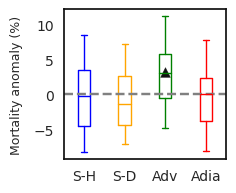

In [46]:
# HW_Meteoro

fig= plt.figure(figsize=(2.5, 2))
ax = plt.axes([0.3, 0.2, 0.65, 0.75])
plot_temp = copy.deepcopy(HW_mortality)*100

all_data = []
for pos,box_position,c in zip(range(4),label_name,['blue','orange','green','red']):
    
    
    box_temp = copy.deepcopy(plot_temp[np.in1d(HW_labels_all1,box_position)][~np.isnan(plot_temp[np.in1d(HW_labels_all1,box_position)])])

    all_data.append(np.nanmean(box_temp))
    bplot = ax.boxplot(box_temp,widths=0.3, positions=[pos+1],whis = [10, 90],showfliers=False)
    for element in ['whiskers','caps','medians','boxes']:
        for patch in bplot[element] :
            plt.setp(patch, color=c)

all_data = np.array(all_data)
scatter_plot = all_data
sig_max = np.nanmax( Significance_all[:,:] ,axis=1)[label_name]
sig_min = np.nanmin( Significance_all[:,:] ,axis=1)[label_name]
scatter_plot[(scatter_plot>sig_min)&(scatter_plot<sig_max)]=np.nan



ax.axhline(y = 0, color = 'grey', linestyle = '--')
print(scatter_plot)

for bnd in ['bottom','top','right','left']:
    ax.spines[bnd].set_color('k')  
ax.set_ylabel('Mortality anomaly (%)',labelpad=1,fontsize=9) 
for bnd in ['bottom','top','right','left']:
    ax.spines[bnd].set_color('k')
ax.grid(b=False)

ax.scatter(np.arange(1,5)[scatter_plot>0],scatter_plot[scatter_plot>0],marker = "^",color='k')
ax.scatter(np.arange(1,5)[scatter_plot<0],scatter_plot[scatter_plot<0],marker = "v",color='k')      
#ax.set_ylim(-0.08,0.08)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['S-H','S-D','Adv','Adia'],fontsize=10)

ax.yaxis.set_label_coords(-.25, .5)
plt.subplots_adjust(wspace=0.6,bottom=0.25,left=0.05,right=0.9)
fig.savefig(r'/Net/Groups/BGI/scratch/yt/figure/Heat_wave_3D_99th_connect6_025/NEW_HW_mortality'+vername+'_detrend.jpg', dpi=300)